In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
airlines = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [9]:
airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [10]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return (x)

In [12]:
df_norm = norm_func(airlines.iloc[:,1:])

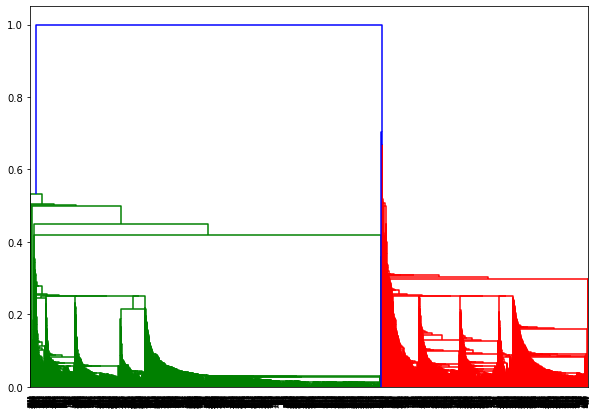

In [14]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [15]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [16]:
from scipy import cluster
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc, columns = ['Clusters'])

In [17]:
airlines['h_clusterid'] = clusters

In [18]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


## KMean

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
air = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [22]:
scaler = StandardScaler()
scaled_air_df = scaler.fit_transform(air.iloc[:,1:])

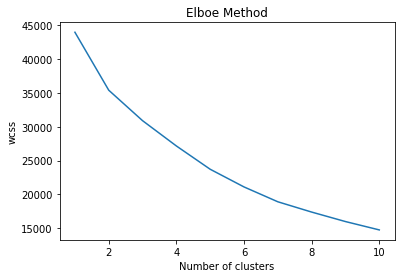

In [26]:
WCSS = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=41)
  kmeans.fit(scaled_air_df)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1,11),WCSS)
plt.title('Elboe Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=43)
clusters_new.fit(scaled_air_df)

KMeans(n_clusters=4, random_state=43)

In [28]:
clusters_new.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [29]:
air['clusters_new']= clusters_new.labels_

In [30]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [31]:
clusters_new.cluster_centers_

array([[ 0.42612922,  0.01680221,  1.20177852, -0.08219068, -0.05467413,
         0.92249027,  0.75101311, -0.08478726, -0.09475455,  0.36829483,
         0.57928862],
       [-0.29251947, -0.06083416, -0.60598611,  0.0317647 , -0.06076011,
        -0.51379135, -0.48539374, -0.18640847, -0.19857812, -0.2023405 ,
        -0.34756052],
       [ 1.19834441,  0.82002725,  0.06242226,  0.14807116, -0.06276658,
         0.58267436,  1.59217228,  3.53177027,  3.79414404,  0.28312709,
         0.9023012 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [32]:
air.groupby('clusters_new').agg(['mean']).reset_index()

,clusters_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1602.922652,116497.154696,156.988161,3.712707,1.002368,1.001579,39398.918706,18.817680,341.081294,1.013418,4880.916338,0.649566
1,1,2239.637931,44118.774687,97.093260,1.224922,1.019201,1.000392,4735.257837,6.934169,199.155564,0.620690,3699.359326,0.202586
2,2,1732.309091,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [36]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


## DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [35]:
al = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [37]:
al.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [39]:
array= air.values
array

array([[    1, 28143,     0, ...,  7000,     0,     1],
       [    2, 19244,     0, ...,  6968,     0,     1],
       [    3, 41354,     0, ...,  7034,     0,     1],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     0],
       [ 4020, 54899,     0, ...,  1401,     0,     1],
       [ 4021,  3016,     0, ...,  1398,     0,     1]])

In [40]:
from numpy.core.numeric import array_equal
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)

In [41]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=1)

In [42]:
dbscan.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [43]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,3
...,...
3994,2
3995,2
3996,3
3997,0


In [45]:
pd.concat([air,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_new,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0
